In [1]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime

In [2]:
#Lectura de los archivos de datos
df1 = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ) )
df2 = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )

In [3]:
df1.tail(1500) 

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
16763,21/12/2018,22:30:00,11.91,11.76,-2.01,2.28,-52.35,-3.77,10.83,283.98,...,0.23,0.04,19.50,67.10,0.04,14.00,13.02,14.14,14.12,0.0
16764,21/12/2018,23:00:00,11.86,11.07,-1.44,3.23,-51.00,-2.81,10.56,283.71,...,0.23,0.04,19.50,67.10,0.04,13.99,13.03,14.13,14.12,0.0
16765,21/12/2018,23:30:00,11.82,10.97,-0.64,3.05,-51.41,-5.68,11.67,284.82,...,0.23,0.04,19.50,67.10,0.04,13.99,13.03,14.13,14.12,0.0
16766,22/12/2018,00:00:00,11.78,10.84,-1.16,1.62,-47.15,-7.77,11.94,285.09,...,0.23,0.04,19.50,67.10,0.04,13.98,13.03,14.12,14.12,0.0
16767,22/12/2018,00:30:00,11.74,10.55,-1.23,2.31,-52.50,-4.38,11.22,284.37,...,0.23,0.04,19.50,67.10,0.04,13.98,13.04,14.12,14.12,0.0
16768,22/12/2018,01:00:00,11.70,10.13,-2.06,0.86,-56.87,-8.87,10.73,283.88,...,0.23,0.04,19.50,67.10,0.04,13.98,13.04,14.12,14.12,0.0
16769,22/12/2018,01:30:00,11.66,9.53,-1.16,2.17,-46.49,-3.97,9.77,282.92,...,0.23,0.04,19.50,67.10,0.04,13.96,13.04,14.10,14.12,0.0
16770,22/12/2018,02:00:00,11.62,9.42,-1.01,1.97,-38.97,-0.16,9.83,282.98,...,0.23,0.04,19.50,67.11,0.04,13.96,13.04,14.10,14.12,0.0
16771,22/12/2018,02:30:00,11.58,9.43,-1.18,2.18,-43.79,-1.30,9.60,282.75,...,0.23,0.04,19.51,67.11,0.04,13.96,13.04,14.10,14.13,0.0
16772,22/12/2018,03:00:00,11.54,9.36,0.11,2.56,-32.24,-0.15,9.85,283.00,...,0.23,0.04,19.53,67.17,0.04,13.96,13.04,14.10,14.12,0.0


In [4]:
#Conteo de los datos nulos
df1.isna().sum()

Date                1016
Time                1016
batt_volt_Min       1016
logger_temp         1016
short_up_Avg        1016
short_dn_Avg        1016
long_up_Avg         1016
long_dn_Avg         1016
cnr4_T_C_Avg        1016
cnr4_T_K_Avg        1016
long_up_corr_Avg    1016
long_dn_corr_Avg    1016
Rs_net_Avg          1016
Rl_net_Avg          1016
albedo_Avg          1016
Rn_Avg              1016
AirTC_Avg           1016
RH                  1016
WS_ms_S_WVT         1016
WindDir_D1_WVT      1403
WindDir_SD1_WVT     1019
Temp_C_Avg(1)       1016
Temp_C_Avg(2)       1016
Temp_C_Avg(3)       1016
Temp_C_Avg(4)       1016
H. suelo 60         1016
Result2_Avg         1016
T. suelo 60 cm      1016
Result4_Avg         1016
Result5_Avg         1016
Result6_Avg         1016
Result7_Avg         1016
Result8_Avg         1016
Result9_Avg         1016
Riego               1016
dtype: int64

In [5]:
#Se eliminan los renglones a partir del renglón 17247
df1 = df1.drop(df1.index[17246:]).reset_index(drop=True)

In [6]:
#Se toman solo las columnas de interés
#df1 = df1.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1 = df1.filter(['WS_ms_S_WVT', 'AirTC_Avg','RH','Rn_Avg','Date','Time', 'albedo_Avg'],axis=1)
df1.head()

,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,Date,Time,albedo_Avg
0,2.33,27.75,20.61,1.79,06/01/2018,17:00:00,0.00
1,3.12,26.57,25.25,-18.59,06/01/2018,17:30:00,0.00
2,2.54,25.01,26.45,-35.10,06/01/2018,18:00:00,0.00
3,2.01,23.65,29.22,-40.13,06/01/2018,18:30:00,-0.16
4,2.14,22.84,31.08,-39.46,06/01/2018,19:00:00,-0.15


In [7]:
#Se crea una nueva columna "FECHA" a partir de las columnas "Date" y "Time"
df1["DATETIME"] = df1["Date"] + " "+ df1["Time"]

#Se convierte la variable DATETIME en una variable FECHA del tipo date
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATETIME'], 1), dayfirst=True)

#Se eliminan las columnas DATETMIE, Date y Time
df1 = df1.drop(['DATETIME',"Date","Time"], 1)

df1.head(50)

,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,FECHA
0,2.33,27.75,20.61,1.79,0.00,2018-01-06 17:00:00
1,3.12,26.57,25.25,-18.59,0.00,2018-01-06 17:30:00
2,2.54,25.01,26.45,-35.10,0.00,2018-01-06 18:00:00
3,2.01,23.65,29.22,-40.13,-0.16,2018-01-06 18:30:00
4,2.14,22.84,31.08,-39.46,-0.15,2018-01-06 19:00:00
5,1.05,22.02,31.85,-35.72,-0.05,2018-01-06 19:30:00
6,0.81,21.01,34.80,-36.20,-0.04,2018-01-06 20:00:00
7,0.24,20.18,37.47,-41.83,-0.14,2018-01-06 20:30:00
8,1.88,18.20,39.41,-45.64,-0.08,2018-01-06 21:00:00
9,1.73,17.61,41.29,-46.96,-0.08,2018-01-06 21:30:00


In [8]:
df1.dtypes

WS_ms_S_WVT           float64
AirTC_Avg             float64
RH                    float64
Rn_Avg                float64
albedo_Avg             object
FECHA          datetime64[ns]
dtype: object

In [9]:
#Se crean las variables DIA y MES
df1['DIA'] = df1['FECHA'].dt.day
df1['MES'] = df1['FECHA'].dt.month

df1.head()

,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,FECHA,DIA,MES
0,2.33,27.75,20.61,1.79,0.00,2018-01-06 17:00:00,6,1
1,3.12,26.57,25.25,-18.59,0.00,2018-01-06 17:30:00,6,1
2,2.54,25.01,26.45,-35.10,0.00,2018-01-06 18:00:00,6,1
3,2.01,23.65,29.22,-40.13,-0.16,2018-01-06 18:30:00,6,1
4,2.14,22.84,31.08,-39.46,-0.15,2018-01-06 19:00:00,6,1


In [10]:
#Se crean las columnas Tmax y Tmin
df1["Tmax"] = df1.groupby(["MES","DIA"])["AirTC_Avg"].transform("max")
df1["Tmin"] = df1.groupby(["MES","DIA"])["AirTC_Avg"].transform("min")

#Se crean las columnas RHmax y RHmin
df1["RHmax"] = df1.groupby(["MES","DIA"])['RH'].transform("max")
df1["RHmin"] = df1.groupby(["MES","DIA"])['RH'].transform("min")

#Se crean las columnas Tmean y RHmean
df1["Tmean"] = df1.groupby(["MES","DIA"])["AirTC_Avg"].transform("mean")
df1["RHmean"] = df1.groupby(["MES","DIA"])["RH"].transform("mean")

df1.head()

,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,FECHA,DIA,MES,Tmax,Tmin,RHmax,RHmin,Tmean,RHmean
0,2.33,27.75,20.61,1.79,0.00,2018-01-06 17:00:00,6,1,27.75,16.03,46.27,20.61,20.760714,35.574286
1,3.12,26.57,25.25,-18.59,0.00,2018-01-06 17:30:00,6,1,27.75,16.03,46.27,20.61,20.760714,35.574286
2,2.54,25.01,26.45,-35.10,0.00,2018-01-06 18:00:00,6,1,27.75,16.03,46.27,20.61,20.760714,35.574286
3,2.01,23.65,29.22,-40.13,-0.16,2018-01-06 18:30:00,6,1,27.75,16.03,46.27,20.61,20.760714,35.574286
4,2.14,22.84,31.08,-39.46,-0.15,2018-01-06 19:00:00,6,1,27.75,16.03,46.27,20.61,20.760714,35.574286


In [11]:
#El datframe tiene que contener: ['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg']
df3 = df1.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)

In [12]:
#Se crea el promedio mensual para cada variable

df1_ene = df1[ ( df1['MES'] == 1 ) ]
df1_ene = df1_ene.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_ene_prom = df1_ene.mean( axis=0, skipna = True )

df1_feb = df1[ ( df1['MES'] == 2 ) ]
df1_feb = df1_feb.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_feb_prom = df1_feb.mean( axis=0, skipna = True )

df1_mar = df1[ ( df1['MES'] == 3 ) ]
df1_mar = df1_mar.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_mar_prom = df1_mar.mean( axis=0, skipna = True )

df1_abr = df1[ ( df1['MES'] == 4 ) ]
df1_abr = df1_abr.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_abr_prom = df1_abr.mean( axis=0, skipna = True )

df1_may = df1[ ( df1['MES'] == 5 ) ]
df1_may = df1_may.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_may_prom = df1_may.mean( axis=0, skipna = True )

df1_jun = df1[ ( df1['MES'] == 6 ) ]
df1_jun = df1_jun.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_jun_prom = df1_jun.mean( axis=0, skipna = True )

df1_jul = df1[ ( df1['MES'] == 7 ) ]
df1_jul = df1_jul.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_jul_prom = df1_jul.mean( axis=0, skipna = True )

df1_ago = df1[ ( df1['MES'] == 8 ) ]
df1_ago = df1_ago.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_ago_prom = df1_ago.mean( axis=0, skipna = True )

df1_sep = df1[ ( df1['MES'] == 9 ) ]
df1_sep = df1_sep.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_sep_prom = df1_sep.mean( axis=0, skipna = True )

df1_oct = df1[ ( df1['MES'] == 10 ) ]
df1_oct = df1_oct.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_oct_prom = df1_oct.mean( axis=0, skipna = True )

df1_nov = df1[ ( df1['MES'] == 11 ) ]
df1_nov = df1_nov.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_nov_prom = df1_nov.mean( axis=0, skipna = True )

df1_dic = df1[ ( df1['MES'] == 12 ) ]
df1_dic = df1_dic.filter(['WS_ms_S_WVT', 'Tmax', 'Tmin', 'Tmean', 'RHmax', 'RHmin', 'RHmean', 'Rn_Avg'],axis=1)
df1_dic_prom = df1_dic.mean( axis=0, skipna = True )

In [13]:
df1_ene_prom

WS_ms_S_WVT     1.944333
Tmax           27.357381
Tmin            7.501104
Tmean          16.971598
RHmax          66.382949
RHmin          14.015733
RHmean         38.450544
Rn_Avg         34.802554
dtype: float64

In [14]:
#Se crea la tabla con los valores promedio mensuales para cada variable
tabla = pd.DataFrame({
    "Parámetros":["Latitud (º N)", "Longitud (º O)", "Elevación (m)", "Velocidad del Viento (m/s)", "Tmax (ºC)", "Tmin (ºC)", "Tmean (ºC)", "RHmax (%)", "RHmin (%)", "RHmean (%)", "Rs (MJ/m^2)"], 
                   "Enero":["28º 55.117 ", "111º 18.638", "101", df1_ene_prom],  
                   "Febrero":["28º 55.117 ", "111º 18.638", "101", df1_feb_prom], 
                   "Marzo":["28º 55.117 ", "111º 18.638", "101", df1_mar_prom],
                   "Abril":["28º 55.117 ", "111º 18.638", "101", df1_abr_prom],
                   "Mayo":["28º 55.117 ", "111º 18.638", "101", df1_may_prom],
                   "Junio":["28º 55.117 ", "111º 18.638", "101", df1_jun_prom],
                   "Julio":["28º 55.117 ", "111º 18.638", "101", df1_jul_prom],
                   "Agosto":["28º 55.117 ", "111º 18.638", "101", df1_ago_prom],
                   "Septiembre":["28º 55.117 ", "111º 18.638", "101", df1_sep_prom],
                   "Octubre":["28º 55.117 ", "111º 18.638", "101", df1_oct_prom],
                   "Noviembre":["28º 55.117 ", "111º 18.638", "101", df1_nov_prom],
                   "Diciembre":["28º 55.117 ", "111º 18.638", "101", df1_dic_prom], 
}) 


ValueError: arrays must all be same length

In [17]:
#Conversión de la variable 'albedo_Avg' de string a numérica 
df1['albedo_Avg'] = df1['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [43]:
#Se crea la tabla con los valores promedio mensuales para cada variable
tabla = pd.DataFrame()

tabla['Vel_prom'] = df1.groupby(['MES'])['WS_ms_S_WVT'].transform('mean') 
tabla['Tmax'] = df1.groupby(['MES'])['Tmax'].transform('mean')
tabla['Tmin'] = df1.groupby(['MES'])['Tmin'].transform('mean')
tabla['Tmean'] = df1.groupby(['MES'])['AirTC_Avg'].transform('mean')
tabla['RHmax'] = df1.groupby(['MES'])['RHmax'].transform('mean')
tabla['RHmin'] = df1.groupby(['MES'])['RHmin'].transform('mean')
tabla['RHmean'] = df1.groupby(['MES'])['RH'].transform('mean')
tabla['Rs'] = df1.groupby(['MES'])['Rn_Avg'].transform('mean')
tabla['Albedo'] = df1.groupby(['MES'])['albedo_Avg'].transform('mean')

In [45]:
#Eliminamos los valores repetidos para quedarnos solamente con un valor por mes
tabla = tabla.drop_duplicates(subset=['Vel_prom','Tmax','Tmin', 'Tmean','RHmax','RHmin', 'RHmean','Rs','Albedo'])       

#Eliminamos las columnas que contengan valores NaN
tabla = tabla.dropna(how='any')

#Reiniciamos el índice
tabla = tabla.reset_index(drop=True)

In [41]:
MESES = [ "ENE", 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
#tabla.set_index( MESES, inplace=True )
print("")

In [46]:
tabla.head(12)

,Vel_prom,Tmax,Tmin,Tmean,RHmax,RHmin,RHmean,Rs,Albedo
0,1.944333,27.357381,7.501104,16.971598,66.382949,14.015733,38.450544,34.802554,-0.423611
1,1.964189,25.320357,9.433214,17.230275,72.542857,25.725357,48.168006,56.250350,-0.479545
2,1.926196,29.519355,8.883548,19.282359,68.361613,15.204839,36.968353,92.894913,-0.409137
3,2.101812,32.671667,10.781667,21.880618,76.585000,15.712333,40.785667,134.012965,-0.386088
4,2.113918,34.133548,12.781290,23.650034,79.971935,17.229032,44.233468,162.405343,-0.367835
5,2.154986,36.968333,19.552667,28.416187,81.381333,25.799667,50.810507,163.926069,-0.381934
6,2.022204,38.419355,24.488387,31.065726,85.183226,32.805806,57.639805,157.534402,-0.189610
7,1.910853,36.985806,24.702581,30.120894,92.539677,42.205484,68.868454,151.273589,-0.381667
8,1.790326,37.576000,23.582333,29.661271,93.100000,36.606333,66.619750,136.749910,-0.486379
9,1.664435,31.346452,16.581613,23.254207,94.842581,37.131613,68.696082,95.513468,-0.614787


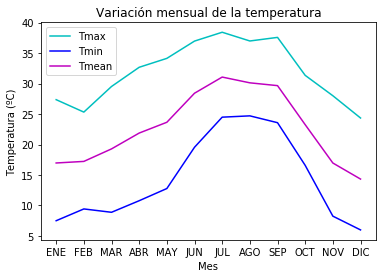

In [48]:
#Gráfica de variación mensual de temperaturas

plt.plot(MESES, tabla['Tmax'], label="Tmax", color = 'c')  
plt.xlabel("Mes")                                          
plt.ylabel("Temperatura (ºC)")                              

#plt.grid()

plt.plot(tabla['Tmin'], label="Tmin", color = 'b')             

plt.plot(tabla['Tmean'], label="Tmean", color = 'm')            

plt.legend()                                                
plt.title('Variación mensual de la temperatura')  
plt.savefig('Temp_mensual',plt=2000)                            
plt.show()             

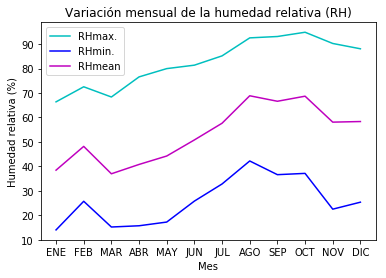

In [51]:
#Gráfica de variación mensual de la humedad relativa

plt.plot(MESES, tabla['RHmax'], label="RHmax.", color = 'c')
plt.xlabel("Mes")                                           
plt.ylabel("Humedad relativa (%)")                               

#plt.grid

plt.plot(tabla['RHmin'], label="RHmin.", color = 'b')   
plt.legend()                                               

plt.plot(tabla['RHmean'], label="RHmean", color = 'm')  
plt.legend()                                                

plt.title('Variación mensual de la humedad relativa (RH)') 
plt.savefig('RH_mensual',plt=2000)                            
plt.show()              

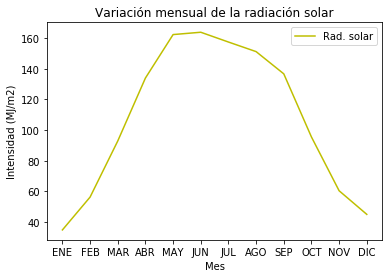

In [53]:
#Gráfica de variación mensual de la radiación solar

plt.plot(MESES, tabla['Rs'], label="Rad. solar", color = 'y') 
plt.xlabel("Mes")                                                         
plt.ylabel("Intensidad (MJ/m2)")    

#plt.grid()

plt.legend()                                                              
plt.title('Variación mensual de la radiación solar')  
plt.savefig('Rs_mensual',plt=2000)                                       
plt.show()   

In [56]:
#Cálculo de la Evotranspiración promedio mensual (ET0) según la ecuación 7:
#ET0 = (0.0252Tmean + 0.078)Rs

ET07 = []
for i in range( 0, len(tabla) ):
    ET07.append( (0.0252*tabla['Tmean'][i] + 0.078)*tabla['Rs'][i]    )

In [105]:
#Cálculo de la Evotranspiración promedio mensual (ET0) según la ecuación 31:
#ET0=0.0393 Rs (Tmean + 9.5)^0.5 - 0.19(Rs^0.6)(φ^0.15) + 0.0061(Tmean + 20)(1.11Tmean - Tmin - 2)^0.7

#φ es la latitud en radianes
φ=(math.pi/180)*28.94917

ET031 = []
for i in range( 0, len(tabla) ):
    ET031.append( 0.0393*tabla['Rs']*(tabla['Tmean'] + 9.5)**0.5 - 0.19*(tabla['Rs']**0.6)*(φ**0.15) + 0.0061*(tabla['Tmean'] + 20)*(1.11*tabla['Tmean'] - tabla['Tmin'] - 2)**0.7 )

In [61]:
#Cálculo de la Evotranspiración promedio mensual (ET0) según la ecuación 32:
#ET0 = 0.051(1 - α)Rs(Tmean + 9.5)^0.5 - 2.4(Rs/Ra)^2 + 0.048(Tmean + 20)(1 - RH/100)(0.5 + 0.536u2) + 0.00012z
#α=albedo
#Ra=radiación solar en lo alto de la atmósfera
#u2=velocidad del viento a 2 metros de altura
#z=elevación sobre el nivel del mar
z=101

#Ra está dada por
#Ra = 24(60)/π (Gsc)(dr)(ωsinφsinδ + cosφcosδsinω)
#Gsc = constante solar = 0.0820 MJm^-2min^-1
#dr = distancia relativa entre la Tierra y el Sol
#ω = ángulo de la hora donde se oculta el sol
#φ = latitud (rad)
#δ = declinación solar (rad)

#Primero se calcula Ra
dr = []
δ = []
ω = []

for k in range ( 0, len(tabla) ):
    j = int(30.4*k - 15)
    dr.append( 1 + 0.033*math.cos( ( (2*math.pi)/365 )*j ) )
    δ.append( 0.409*math.sin( ( (2*math.pi)/365)*j - 1.39 ) )
    ω.append( math.acos( -math.tan(φ)*math.tan( 0.409*math.sin( ((2*math.pi)/365)*j - 1.39 ) ) ) )

In [59]:
#Convertimos los arreglos a valores numéricos y los almacenamos en un DataFrame de Variables
aux = pd.DataFrame()

aux['dr'] = dr
aux['dr'] = aux['dr'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

aux['δ'] = δ
aux['δ'] = aux['δ'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

aux['ω'] = ω
aux['ω'] = aux['ω'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [60]:
#Calculo de Ra
Ra = []
for i in range ( 0, len(tabla) ):
    Ra.append( ( (24*60)/math.pi)*0.0820*( aux['ω'][i]*math.sin(φ)*math.sin( aux['δ'][i] ) + math.cos(φ)*math.cos( aux['δ'][i] )*math.sin( aux['ω'][i] ) ) )

#Convertimos Ra a valores numéricos
aux['Ra'] = Ra
aux['Ra'] = aux['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [63]:
#Cálculo de la Evotranspiración promedio mensual (ET0) según la ecuación 32:

ET034 = []
for i in range( 0, len(tabla) ):
    ET034 = 0.051*(1 - tabla['Albedo'][i])*tabla['Rs'][i]*(tabla['Tmean'][i] + 9.5)**0.5 - 2.4*(tabla['Rs'][i]/aux['Ra'][i])**2 + 0.048*(tabla['Tmean'][i] + 20)*(1 - tabla['RHmean'][i]/100)*(0.5 + 0.536*tabla['Vel_prom'][i]) + 0.00012*z

In [107]:
#Se crea un dataframe con los resultados para la Evapotranspiración según la ecuación 7, 31 y 32:
df = pd.DataFrame()

df['ET0_7'] = ET07
df['ET0_31'] = ET031
df['ET0_34'] = ET034

df['MES'] = MESES

df.set_index('MES', drop=True, inplace=True)

df.head(12)

,ET0_7,ET0_31,ET0_34
MES,,,
ENE,17.599104,0 6.671510 1 10.451888 2 18.22980...,8.148608
FEB,28.811594,0 6.671510 1 10.451888 2 18.22980...,8.148608
MAR,52.384876,0 6.671510 1 10.451888 2 18.22980...,8.148608
ABR,84.346631,0 6.671510 1 10.451888 2 18.22980...,8.148608
MAY,109.458090,0 6.671510 1 10.451888 2 18.22980...,8.148608
JUN,130.171712,0 6.671510 1 10.451888 2 18.22980...,8.148608
JUL,135.614481,0 6.671510 1 10.451888 2 18.22980...,8.148608
AGO,126.623032,0 6.671510 1 10.451888 2 18.22980...,8.148608
SEP,112.882131,0 6.671510 1 10.451888 2 18.22980...,8.148608


In [65]:
print("PARTE 2")

PARTE 2


In [68]:
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [71]:
#Tomando las variables relevantes
df2 = df2.filter(['Year', 'DoY', 'Hour', 'Rg_f', 'LE_f', 'H_f'],axis=1)

#Se elimina el 1er renglón, que contiene las unidades en las que se miden las variables
df2 = df2.drop( df2.index[0] ).reset_index(drop=True)

df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,1.5,-0.96,8.61,-9.76
1,2018,7,2,-2.06,1.93,-8.55
2,2018,7,2.5,-1.32,6.40,-0.55
3,2018,7,3,-1.22,2.44,-2.92
4,2018,7,3.5,-1.14,2.40,-2.61


In [74]:
#Conteo de los datos nulos
df2.isna().sum()

Year    0
DoY     0
Hour    0
Rg_f    0
LE_f    0
H_f     0
dtype: int64

In [108]:
#Conversión de la variable Hour a string.
df2['Hour'] = df2['Hour'].astype(str)

In [72]:
# Rn-G es la radiación neta (Rg_f)
# λET  es el calor latente (LE_f)
# H es el calor sensible (H_f)

In [110]:
#Se crea una variable de fecha en df2
df2['DATETIME'] = df2['Year'] + "-" + df2['DoY'] + "-" + df2['Hour']
df2.head(10)

,Year,DoY,Hour,Rg_f,LE_f,H_f,DATETIME
0,2018,7,1.5,-0.96,8.61,-9.76,2018-7-1.5
1,2018,7,2,-2.06,1.93,-8.55,2018-7-2
2,2018,7,2.5,-1.32,6.40,-0.55,2018-7-2.5
3,2018,7,3,-1.22,2.44,-2.92,2018-7-3
4,2018,7,3.5,-1.14,2.40,-2.61,2018-7-3.5
5,2018,7,4,-1.74,2.49,-1.29,2018-7-4
6,2018,7,4.5,-1.24,5.80,-8.07,2018-7-4.5
7,2018,7,5,-1.31,2.39,3.08,2018-7-5
8,2018,7,5.5,-2.51,-1.72,5.62,2018-7-5.5
9,2018,7,6,-1,5.55,1.41,2018-7-6


In [111]:
#Se crean listas con los valores de hora y minuto para cada dato

hora=[]
minuto=[]

for i in range (0, len(df2) ):

    #Si contiene 1 dígito:
    if (len(str(df2['Hour'][i]))==1):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('00')
        
    #Si contiene 2 dígitos:
    if(len(str(df2['Hour'][i]))==2):
        if (str(df2['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:        
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('00')
    
    #Si contiene 3 dígitos:
    elif(len(str(df2['Hour'][i]))==3):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('30')

    #Si contiene 4 dígitos:
    elif(len(str(df2['Hour'][i]))==4):
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('30')

In [112]:
#Se crea una lista con el número de día para cada dato
dias =[df2['DoY'][i] for i in range(0,len(df2))]

In [114]:
#Se agrupa lo anterior en un datafram
d = {'DIA': dias, 'HORA': hora, 'MINUTO':minuto}
df_fecha = pd.DataFrame(d)
df_fecha.head()

,DIA,HORA,MINUTO
0,7,1,30
1,7,2,00
2,7,2,30
3,7,3,00
4,7,3,30


In [115]:
#Se convierte la variable DIA a numérico
df_fechas['DIA'] = df_fechas['DIA'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [116]:
#Los datos toman un dato con la hora 00:00 como perteneciente al día anterior. 
#Para reparar esto, se suma la unidad al valor del día donde esto sucede.

dia=[]
for i in range( 0, len(df_fecha)):
    if (df_fechas['HORA'][i]=='00' and df_fechas['MINUTO'][i]=='00'):
        dia.append(df_fechas['DIA'][i] +1)
    else:
        dia.append(df_fechas['DIA'][i])
        
df_fechas['DIA']=dia

In [117]:
#Llenamos un arreglo con los valores de la fecha en el formato deseado

fechas = []
for i in range ( 0, len(df2) ):
    fechas.append('2018 '+str(df_fechas['DIA'][i])+ ' ' + df_fechas['HORA'][i]+' '+df_fechas['MINUTO'][i])

    
#Se convierten los elementos del arreglo de fechas a variables tipo datetime
FECH = []
for i in range( 0, len(df2) ):
    d = datetime.datetime.strptime( fechas[i],'%Y %j %H %M').isoformat(' ')
    FECH.append(d)

In [120]:
#Se convierten las variables de df2 a floats
df2 = df2.apply(pd.to_numeric, errors='coerce')

#Se añade la columna FECH al dataframe y se convierte a datetime
df2['FECH'] = FECH
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECH'], 1), dayfirst=True)
df2 = df2.drop(['FECH','Year','DoY','Hour', 'DATETIME'], 1)

df2.head()

,Rg_f,LE_f,H_f,FECHA
0,-0.96,8.61,-9.76,2018-01-07 01:30:00
1,-2.06,1.93,-8.55,2018-01-07 02:00:00
2,-1.32,6.40,-0.55,2018-01-07 02:30:00
3,-1.22,2.44,-2.92,2018-01-07 03:00:00
4,-1.14,2.40,-2.61,2018-01-07 03:30:00


In [121]:
df2['MES'] = df2['FECHA'].dt.month
df2['DIA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

In [122]:
#Cálculo del promedio por hora de cada variable, las cuales se introducen en un nuevo DataFrame
df3 = pd.DataFrame()

df3['FECHA'] = df2['FECHA']
df3['MES'] = df2['MES']
df3['DIA'] = df2['DIA']
df3['HORA'] = df2['HORA']
df3["Rg_f_mean"] = df2.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
df3["LE_f_mean"] = df2.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
df3["H_f_mean"] = df2.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

df3 = df3.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])

In [123]:
#Se selecciona el mes de noviembre
df3 = df3[ df3['MES'] == 11 ]
df3 = df3.reset_index(drop=True)
df3.head()

,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,2018-11-01 00:00:00,11,1,0,-2.035,3.765,-9.455
1,2018-11-01 01:00:00,11,1,1,-2.415,7.430,-21.565
2,2018-11-01 02:00:00,11,1,2,-2.635,-1.745,-22.315
3,2018-11-01 03:00:00,11,1,3,-2.490,13.935,-32.895
4,2018-11-01 04:00:00,11,1,4,-3.390,0.085,-4.805


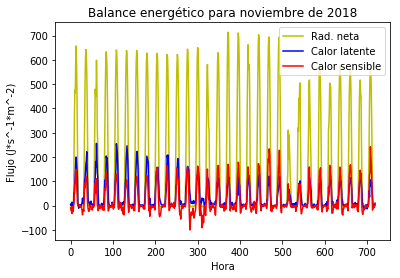

In [129]:
#Gráfica de balance de energía para el mes de febrero     

plt.plot(df3['Rg_f_mean'], label="Rad. neta", color = 'y')   
plt.xlabel("Hora")                                           
plt.ylabel("Flujo (J*s^-1*m^-2)")                               

plt.plot(df3['LE_f_mean'], label="Calor latente", color = 'b')   
plt.legend()                                                

plt.plot(df3['H_f_mean'], label="Calor sensible", color = 'r') 
plt.legend()                                                

plt.title('Balance energético para noviembre de 2018')  
plt.savefig('Balance_mensual',plt=2000)                          
plt.show()                                                  

In [130]:
#Se crea otro dataframe para el 20 de noviembre
df4 = df3[df3['DIA']==20]
df4 = df4.reset_index(drop=True)
df4.head()

,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,2018-11-20 00:00:00,11,20,0,0.0,-0.380,-2.840
1,2018-11-20 01:00:00,11,20,1,0.0,0.695,5.705
2,2018-11-20 02:00:00,11,20,2,0.0,8.840,1.980
3,2018-11-20 03:00:00,11,20,3,0.0,-0.435,-0.895
4,2018-11-20 04:00:00,11,20,4,0.0,0.180,-0.320


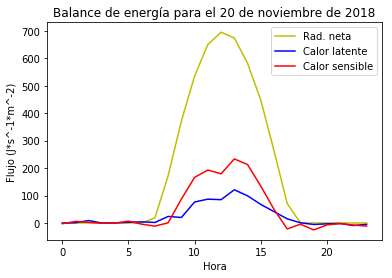

In [132]:
HORAS = [i for i in range(0,24)]

#Gráfica de balance de energía para el 20 de noviembre

plt.plot(HORAS, df4['Rg_f_mean'], label="Rad. neta", color = 'y')   
plt.xlabel("Hora")                                           
plt.ylabel("Flujo (J*s^-1*m^-2)")                               

plt.plot(df4['LE_f_mean'], label="Calor latente", color = 'b')  
plt.legend()                                                

plt.plot(df4['H_f_mean'], label="Calor sensible", color = 'r')  
plt.legend()                                                

plt.title('Balance de energía para el 20 de noviembre de 2018')  
plt.savefig('Balance_diario',plt=2000)                            
plt.show()        

In [133]:
#Buscamos por hora graficar el promedio mensual para una hora durante el mes de febrero

#Promedio por hora en noviembre
df5 = pd.DataFrame()
df5['HORA'] = df3['HORA']
df5['FECHA'] = df3['FECHA']
df5["Rg_f_mean"] = df3.groupby(["HORA"])["Rg_f_mean"].transform("mean")
df5["LE_f_mean"] = df3.groupby(["HORA"])["LE_f_mean"].transform("mean")
df5["H_f_mean"] = df3.groupby(["HORA"])["H_f_mean"].transform("mean")
df5 = df5.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
df5.head()

,HORA,FECHA,Rg_f_mean,LE_f_mean,H_f_mean
0,0,2018-11-01 00:00:00,-1.4535,3.033000,-7.871167
1,1,2018-11-01 01:00:00,-1.2640,2.428833,-5.603833
2,2,2018-11-01 02:00:00,-1.2525,3.933333,-6.482833
3,3,2018-11-01 03:00:00,-1.2085,4.696833,-7.904667
4,4,2018-11-01 04:00:00,-1.1335,2.652000,-8.223167


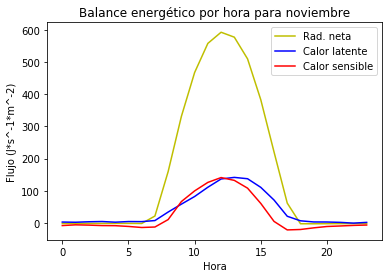

In [134]:
#Gráfica de balance de energía para noviembre (promedio de cada una de las horas

plt.plot( HORAS, df5['Rg_f_mean'], label="Rad. neta", color = 'y')         
plt.xlabel("Hora")                                      
plt.ylabel("Flujo (J*s^-1*m^-2)")                               

plt.plot( df5['LE_f_mean'], label="Calor latente", color = 'b')   
plt.legend()                                                

plt.plot( df5['H_f_mean'], label="Calor sensible", color = 'r')  
plt.legend()                                                

plt.title('Balance energético por hora para noviembre')       
plt.savefig('Balance_hora_mensual',plt=2000)                        
plt.show()                               